# Week 9
## Clustering with K-Means.
  
  
Ayal Gussow, 03/29/2018

# Recall the Iris Dataset

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets
iris = datasets.load_iris()

columns = ("sepal_length", "sepal_width", "petal_length", "petal_width", "species")

iris_4d = pd.DataFrame(data= np.c_[iris["data"], iris["target"]], columns=columns)
iris_4d = iris_4d.drop(columns="species")

iris = iris_4d.drop(columns=["petal_width", "petal_length"])
#print(iris_4d)
#print(iris)

# Let's start - KMeans using two clusters

In [5]:
from sklearn.cluster import KMeans

model = KMeans(
    n_clusters=2,
    init='k-means++', # default, also: random
    n_init=10, # default, also: 5, 1
    max_iter=300, # default
    tol=1e-4, # default
    random_state=123124,
)
model.fit(iris)
cluster_labels = model.predict(iris)
print(cluster_labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 1 0 0 1 1 1
 1 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1 0 1 1 1 1
 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 0]


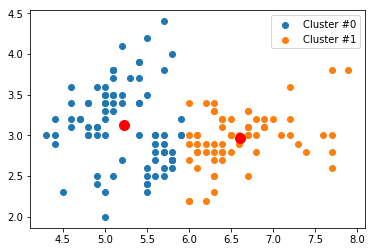

In [6]:
def plot_kmeans(original_data, cluster_labels, model, k):
    """Plot the clusters and centroids for a model trained on the Iris dataset."""
    # Scatter plots of each species
    for cluster_idx in range(k):
        plt.scatter(
            original_data.iloc[cluster_labels == cluster_idx, 0],
            original_data.iloc[cluster_labels == cluster_idx, 1],
            label="Cluster #{}".format(cluster_idx),
        )
    plt.legend()
    #plt.scatter(original_data[cluster_labels == 1, 0], original_data[cluster_labels == 1, 1], s = 100, c = 'blue', label = 'Species 1')

    # Add centroids to plot
    plt.scatter(
        model.cluster_centers_[:, 0],
        model.cluster_centers_[:,1],
        s=100,
        c='red',
    )

plot_kmeans(iris, cluster_labels, model, 2)

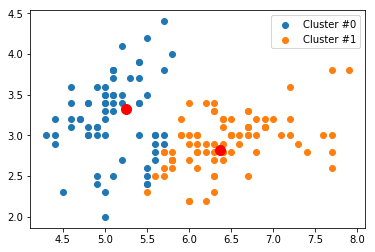

In [7]:
model = KMeans(
    n_clusters=2,
    init="random", #'k-means++', # default, also: random
    n_init=1, # default, also: 20, 5, 1
    max_iter=1, # default / 1
)
model.fit(iris)
cluster_labels = model.predict(iris)
plot_kmeans(iris, cluster_labels, model, 2)

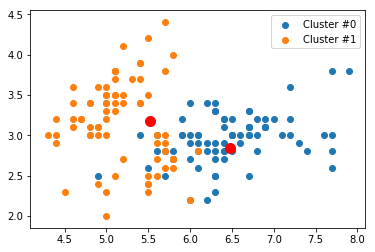

In [8]:
model = KMeans(
    n_clusters=2,
    init="random", #'k-means++', # default, also: random
    n_init=1, # default, also: 20, 5, 1
    max_iter=1, # default / 1
)
model.fit(iris_4d)
cluster_labels = model.predict(iris_4d)
plot_kmeans(iris, cluster_labels, model, 2)

# The Elbow Method

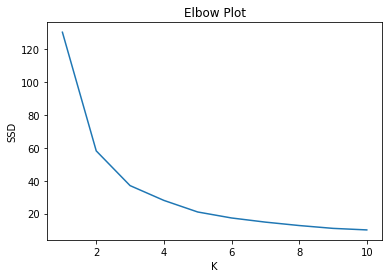

In [9]:
def plot_elbow(dataset, max_clusters):
    """Plot elbow curve for k-means."""
    inertias = []
    for i in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=i, random_state=768797)
        kmeans.fit(dataset)
        inertias.append(kmeans.inertia_)

    plt.plot(range(1, max_clusters + 1), inertias)
    plt.title("Elbow Plot")
    plt.xlabel("K")
    plt.ylabel("SSD")

plot_elbow(iris, 10)

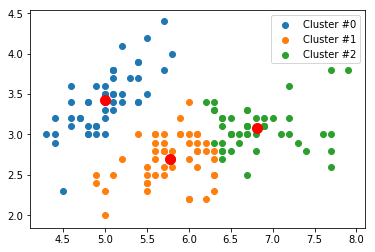

In [10]:
model = KMeans(n_clusters=3)
cluster_labels =model.fit_predict(iris)
plot_kmeans(iris, cluster_labels, model, 3)

# Silhouette Coeff

Favors tight clusters.

{2: 0.681046169211746,
 3: 0.5528190123564091,
 4: 0.4980505049972867,
 5: 0.4887488870931048,
 6: 0.3678464984712235,
 7: 0.3566882476581684,
 8: 0.3382213852064495,
 9: 0.33560262904828286}


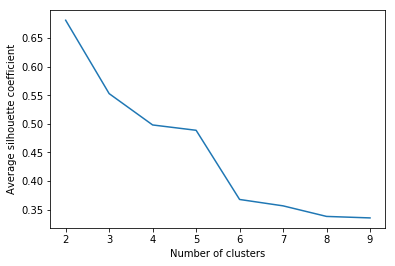

In [11]:
# Silhouette is used for assessing the performance of an unlabeled dataset
from sklearn.metrics.cluster import silhouette_score
import pprint

def calc_silhouette(dataset, n):
    """Runs Kmeans clustering and returns average silhouette coefficient"""    
    kmeans = KMeans(n_clusters=n).fit(dataset)
    score = silhouette_score(dataset, kmeans.labels_)
    return score

scores = {n: calc_silhouette(iris_4d, n) for n in range(2, 10)}
pprint.pprint(scores)
plt.plot(
    list(scores.keys()),
    list(scores.values())
)

plt.xlabel("Number of clusters")
plt.ylabel("Average silhouette coefficient")
plt.show()